#### Rare Labels 
Categorical variables are those which values are selected from a group of categories, also called labels. Different labels appear in the dataset with different frequencies. Some categories appear a lot in the dataset, whereas some other categories appear only in a few number of observations.

For example, in a dataset with information about loan applicants where one of the variables is "city" where the applicant lives, cities like 'New York' may appear a lot in the data because New York has a huge population, whereas smaller towns like 'Leavenworth' will appear only on a few occasions (population < 2000 people), because the population there is very small. A borrower is more likely to live in New York, because far more people live in New York.

In fact, categorical variables often contain a few dominant labels that account for the majority of the observations and a large number of labels that appear only seldom.

##### Is it a problem in Categorical variables ?
Rare values can add a lot of information or none at all. For example, consider a stockholder meeting where each person can vote in proportion to their number of shares. One of the shareholders owns 50% of the stock, and the other 999 shareholders own the remaining 50%. The outcome of the vote is largely influenced by the shareholder who holds the majority of the stock. The remaining shareholders may have an impact collectively, but they have almost no impact individually.

The same occurs in real life datasets. The label that is over-represented in the dataset tends to dominate the outcome, and those that are under-represented may have no impact individually, but could have an impact if considered collectively.

More specifically,

Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.

A big number of infrequent labels adds noise, with little information, therefore causing over-fitting.

Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set.

Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it.

Note Sometimes rare values, are indeed important. For example, if we are building a model to predict fraudulent loan applications, which are by nature rare, then a rare value in a certain variable, may be indeed very predictive. This rare value could be telling us that the observation is most likely a fraudulent application, and therefore we would choose not to ignore it.




**Here, we will know:**
- Learn to identify rare labels in a dataset
- Understand how difficult it is to derive reliable information from    them.
- Visualise the uneven distribution of rare labels between train and test sets


Dataset: House price 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to separate data intro train and test sets
from sklearn.model_selection import train_test_split

In [2]:
# let's load the dataset with the variables
data = pd.read_csv('../datasets/houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Variable definitions:

# Neighborhood: Physical locations within Ames city limits
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)

use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']
data = data[use_cols]
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [4]:
# let's find out each categorical variables

cat_cols= ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print(f"Variable name: {col}, number of labels: {data[col].nunique()}")

print(f"total instances: {len(data)}")

Variable name: Neighborhood, number of labels: 25
Variable name: Exterior1st, number of labels: 15
Variable name: Exterior2nd, number of labels: 16
total instances: 1460


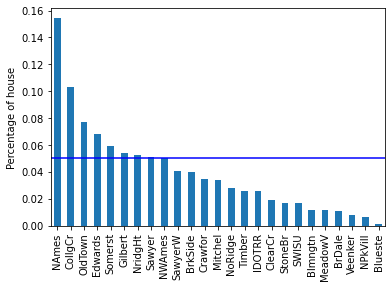

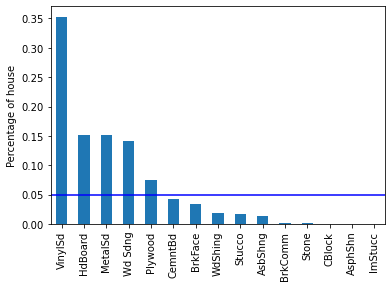

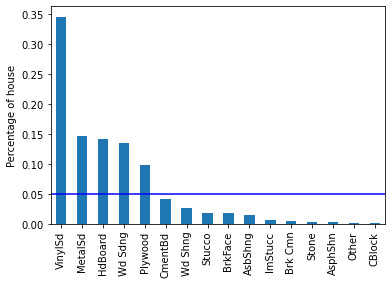

In [5]:
# let's visualise the each category with the label and number of house

number_of_houses = len(data)

for col in cat_cols:
    # calculation percentage of houser per category
    temp_df = pd.Series(data[col].value_counts() / number_of_houses)

    # plotting in precentage
    fig = temp_df.sort_values(ascending=False).plot.bar()

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='blue')
    fig.set_ylabel('Percentage of house')
    plt.show()


For each of the categorical variables, some labels appear in more than 10% of the houses and many appear in less than 10% or even 5% of the houses. These are infrequent labels or Rare Values and could cause over-fitting.

#### How is the target, "SalePrice", related to those categories?


In [6]:
# lets calculate the average price for each categorical variable

def compute_avg_sales_by_variable(df, variable):
    num_houses = len(df)
    # computing % of each label 
    temp_df = pd.Series(df[variable].value_counts() / num_houses).reset_index()
    temp_df.columns = [variable, 'precentage_houses']
    
    # calc avg sale using grouping and merge
    temp_df = temp_df.merge(df.groupby([variable]).mean().reset_index(), 
                                on=variable,
                                how='left'
                            )
    return temp_df


In [7]:
neighborhood_data =  compute_avg_sales_by_variable(data, "Neighborhood")
neighborhood_data

,Neighborhood,precentage_houses,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209
5,Gilbert,0.054110,192854.506329
6,NridgHt,0.052740,316270.623377
7,Sawyer,0.050685,136793.135135
8,NWAmes,0.050000,189050.068493
9,SawyerW,0.040411,186555.796610


In [8]:
# let's visualise the data. We can use bar chart, and line chart

def plot_cat_with_average_sales(df, variable):
    fig, ax = plt.subplots(figsize= (9,5))
    plt.xticks(df.index, df[variable], rotation=90)

    # create another plot and share
    ax2 = ax.twinx()
    ax.bar(df.index, df['precentage_houses'], color='lightgrey')
    ax2.plot(df.index, df['SalePrice'], color='green', label='Seconds')
    ax.axhline(y=0.04, color='red')
    ax.set_xlabel(variable)
    ax.set_ylabel("Percentage of houses per category")
    ax2.set_ylabel("Average sales price per category")

    plt.show()


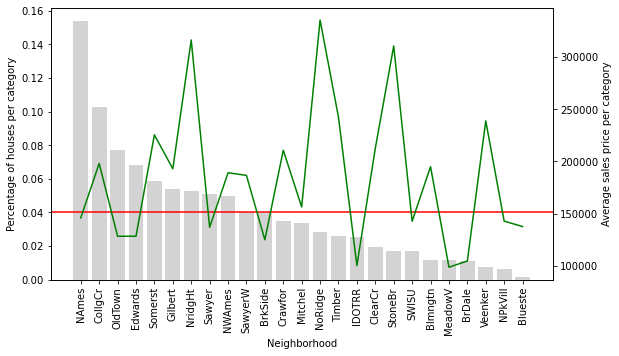

In [9]:
plot_cat_with_average_sales(neighborhood_data,'Neighborhood')

Houses in the 'Neighborhood' of 'NridgHt' sell at a high price, whereas houses in 'Sawyer' tend to be cheaper.

Houses in the 'Neighborhood' of StoneBr have on average a high SalePrice, above 300k. However, StoneBr is present in less than 5% of the houses. Or in other words, less than 5% of the houses in the dataset are located in StoneBr.

Why is this important? Because if we do not have a lot of houses to learn from, we could be under or over-estimating the effect of StoneBr on the SalePrice.

In other words, how confident are we to generalise that most houses in StoneBr will sell for around 300k, when we only have a few houses to learn from?

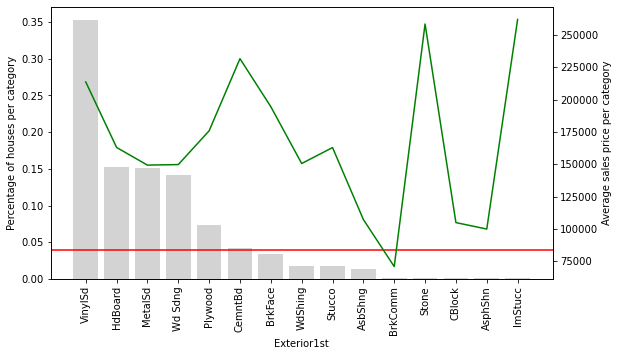

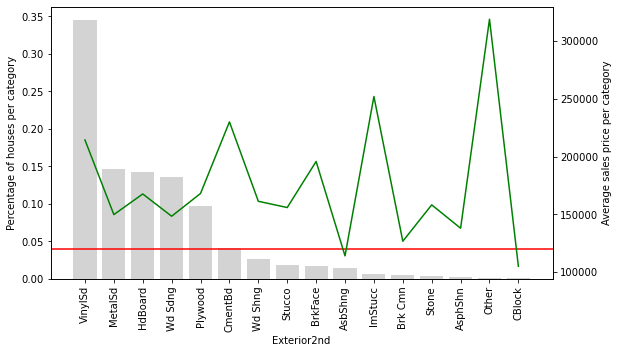

In [10]:
# lets plot other variables as well

for col in cat_cols:
    if col != "Neighborhood":
        temp_df = compute_avg_sales_by_variable(data, col)
        plot_cat_with_average_sales(temp_df,  col)

Let's look at variable Exterior2nd: Most of the categories in Exterior2nd are present in less than 5% of houses. In addition, the "SalePrice" varies a lot across those rare categories. The mean value of SalePrice goes up and down over the infrequent categories. In fact, it looks quite noisy. These rare labels could indeed be very predictive, or they could be introducing noise rather than information. And because the labels are under-represented, we can't be sure whether they have a true impact on the house price. We could be under or over-estimating their impact due to the fact that we have information for few houses.

Lets use error plot to examine more on rare or other category.

In [14]:
# def plot_error(df, variable_x, variable_y):
#     std = df[variable_y].std()
#     plt.errorbar(df[variable_x], df[variable_y], std, linestyle='None', marker='^')
#     plt.xticks(rotation=90)
#     plt.show()


In [111]:
def plot_box_errors(df, variable):
    temp_df = df.groupby(variable)
    categories = df[variable].unique()

    fig = plt.figure(figsize =(12, 7))

    all_data = []
    for cat in categories:
        cat_data = temp_df.get_group(cat).SalePrice
        all_data.append(cat_data)

    plt.boxplot(all_data)
    plt.xticks(range(1, len(categories)+1),categories.tolist(), rotation=90)
    plt.title(f"Boxplot for {variable}")
    plt.ylabel("House price")
    plt.show()

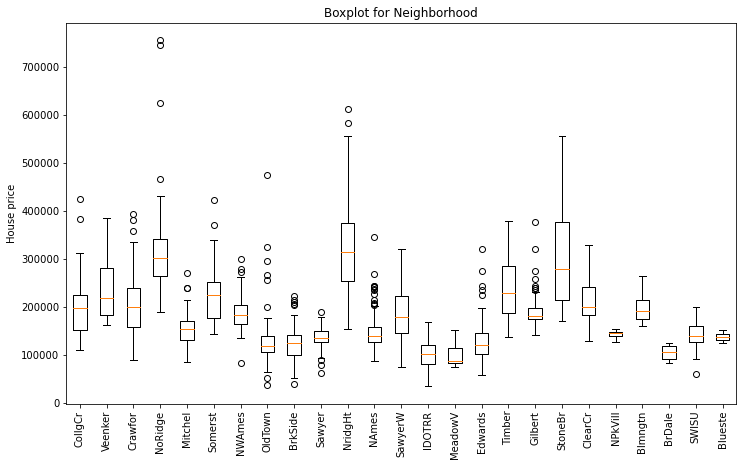

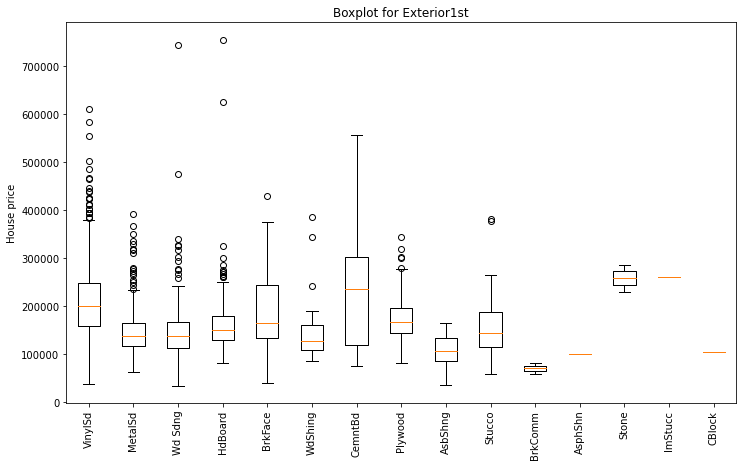

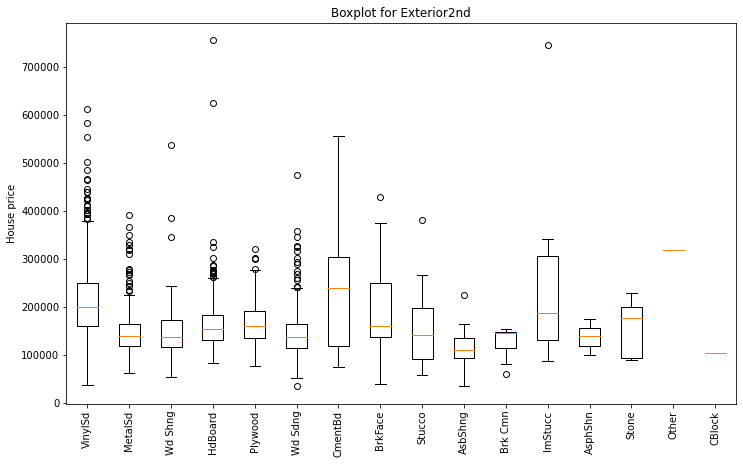

In [112]:
for col in cat_cols:
    plot_box_errors(data, col)

The boxplot shows the outliers in each category of three variables - Neighborhood, Exterior1st  and exterior2nd. In exterior first and second, the frequent category - VinySld, has most outliers. Categories such as other and CBlock has no proper data to represent. lets engineer them.

#### Rare labels: grouping under a new label
One common way of working with rare or infrequent values, is to group them under an umbrella category called 'Rare' or 'Other'. In this way, we are able to understand the "collective" effect of the infrequent labels on the target. See below.

In [114]:
temp_df = pd.Series(data['Neighborhood'].value_counts() / number_of_houses)

In [127]:
# Replace all the labels that appear in less than 5%
# of the houses by the label 'rare'

def group_rare_labels(df, var):

    total_houses = len(df)

    # first calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }
    
    # replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [128]:
# group rare labels in Neighborhood

data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')

data[['Neighborhood', 'Neighborhood_grouped']].head(10)

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,rare
2,CollgCr,CollgCr
3,Crawfor,rare
4,NoRidge,rare
5,Mitchel,rare
6,Somerst,Somerst
7,NWAmes,NWAmes
8,OldTown,OldTown
9,BrkSide,rare


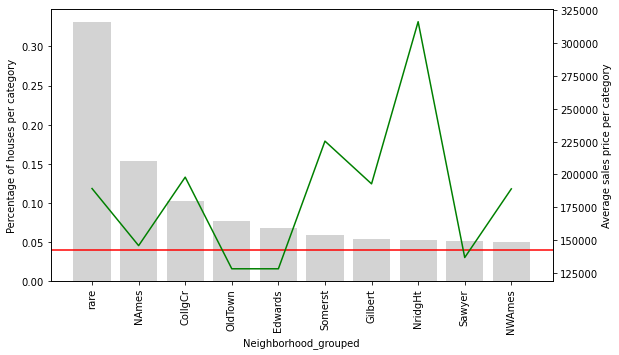

In [129]:
# let's plot Neighborhood with the grouped categories
# re-using the functions

temp_df = compute_avg_sales_by_variable(data, 'Neighborhood_grouped')
plot_cat_with_average_sales(temp_df, 'Neighborhood_grouped')

"rare" now contains the overall influence of all the infrequent categories on the SalePrice. Compare it with previous plot. Lets see the box plot too.

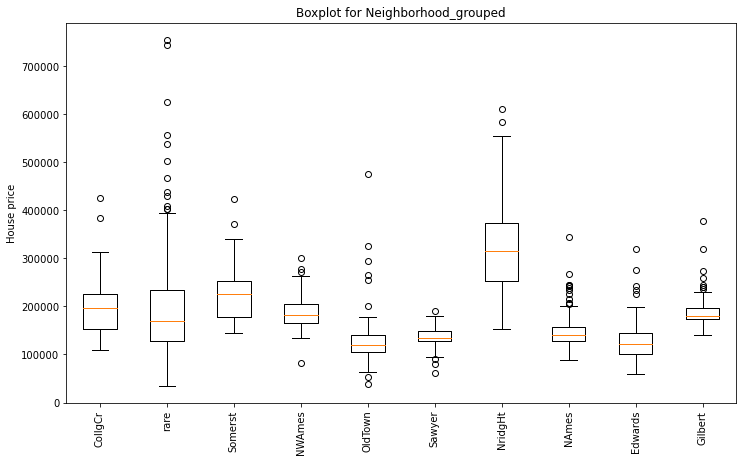

In [130]:
plot_box_errors(data, 'Neighborhood_grouped')

This shows we have representable data and also has most outliers. Lets do the same process for exterior feature.

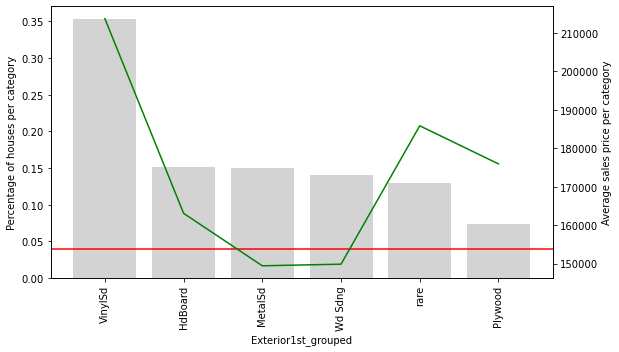

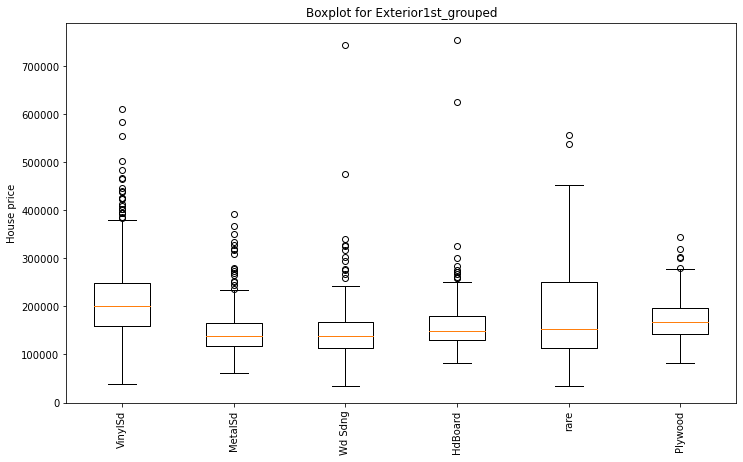

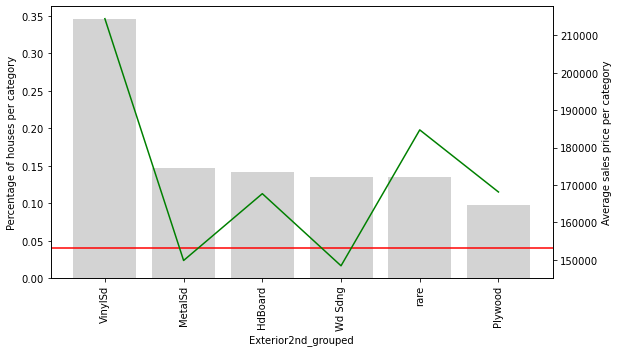

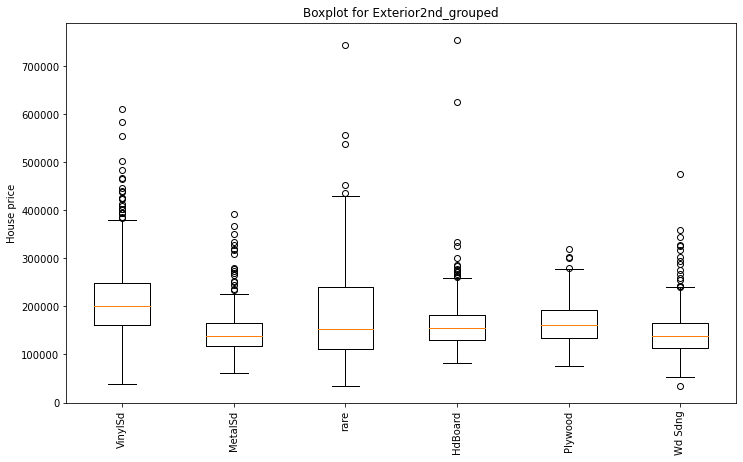

In [131]:
for col in cat_cols[1:]: 
    # re using the functions I created
    data[col+'_grouped'] = group_rare_labels(data, col)
    temp_df = compute_avg_sales_by_variable(data, col+'_grouped')
    plot_cat_with_average_sales(temp_df, col+'_grouped')
    plot_box_errors(data, col+'_grouped')

Here is something interesting: In the variable Exterior1st, look at how all the houses with rare values are on average more expensive than the rest, except for those with VinySd.

The same is true for Exterior2nd. The rare categories seem to have had something in common.

Note: Ideally, we can see standard deviation / inter-quantile range for the SalePrice, to get an idea of how variable the house price is for each category.

##### Rare labels lead to uneven distribution of categories in train and test sets

Similarly to highly cardinal variables, rare or infrequent labels often land only on the training set, or only on the testing set. If present only in the training set, they may lead to over-fitting. If present only on the testing set, the machine learning algorithm will not know how to handle them, as they have not seen the rare labels during training. Let's explore this further.

In [133]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[cat_cols],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=2910
                                                )

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Train Shape: (1022, 3), Test Shape: (438, 3)


In [134]:
only_in_train = [
    x for x in X_train['Exterior1st'].unique() if x not in X_test['Exterior1st'].unique()
]
print(f"Exterior1st's categories only present in Trainset: {only_in_train}")

only_in_test = [
    x for x in X_test['Exterior1st'].unique() if x not in X_train['Exterior1st'].unique()
]
print(f"Exterior1st's categories only present in Testset: {only_in_test}")

Exterior1st's categories only present in Trainset: ['Stone', 'BrkComm', 'ImStucc', 'CBlock']
Exterior1st's categories only present in Testset: ['AsphShn']
